# Ingeniería de Descriptores

In [1]:
!pip install openpyxl

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [3]:
# Importar datos Viejos
df_ini = pd.read_excel('/work/Delcavideograpghy_Consolidado_priori_.xlsx', index_col= 'Unnamed: 0')
pd.DataFrame(df_ini)
df_ini.head()

,nombre_video,fecha_publicacion,suscriptores,tus_ingresos_estimados_(usd),porcentaje_de_clics_de_las_impresiones_(%),id,likes,dislikes,rating,viewCount,...,Duracion Minutos,Densidad_Publicitaria,porc_min_publi1,porc_min_publi2,porc_min_publi3,porc_min_publi4,porc_min_publi5,porc_min_publi6,porc_min_publi7,porc_min_publi8
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1,1.359,0.87,7nF_xuJXP2Y,79,2,4.901235,1233,...,7.533333,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,5,2.184,4.18,e4G-6BlBGdY,75,8,4.614458,2132,...,12.800000,0.312,0.361979,0.496094,0.700521,0.851562,NaN,NaN,NaN,NaN
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,35,7.989,2.98,gDyOAURjjrc,160,8,4.809524,2966,...,35.066667,0.228,0.089829,0.206749,0.345057,0.464354,0.610741,0.743346,0.854563,0.991445
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,15,5.123,1.88,uh-dv1gvpTI,214,7,4.873303,2643,...,12.833333,0.234,0.287013,0.494805,0.785714,NaN,NaN,NaN,NaN,NaN
6,Tips BÁSICOS para CREAR LOGOS EFICIENTES ▶ TU...,20210819,2,0.958,1.09,0ZNtr90_roU,51,3,4.777778,872,...,6.633333,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Importar datos Nuevos
df_new = pd.read_excel("/work/Datos Nuevos YouTube_.xlsx", sheet_name="Datos Nuevos YouTube 7d")
df_new.rename({'Contenido': 'id'}, inplace = True, axis=1)
df_new = pd.DataFrame(df_new)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  500 non-null    object 
 1   T√≠tulo del v√≠deo                                  499 non-null    object 
 2   Hora de publicaci√≥n del v√≠deo                     499 non-null    object 
 3   Clics por elemento de pantalla final mostrado (%)   203 non-null    float64
 4   Clics en elementos de pantalla final                450 non-null    float64
 5   Clics en teaser por teaser de tarjeta mostrado (%)  290 non-null    float64
 6   Clics en teaser de tarjeta                          450 non-null    float64
 7   Clics por tarjeta mostrada (%)                      20 non-null     float64
 8   Tarjetas mostradas                                  450 non-null    float64
 9  

In [5]:
# Unión tablas
df=df_ini.merge(df_new,how='inner', on='id').set_index('id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 7nF_xuJXP2Y to Piah0r6Wad0
Data columns (total 59 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   nombre_video                                        105 non-null    object        
 1   fecha_publicacion                                   105 non-null    int64         
 2   suscriptores                                        105 non-null    int64         
 3   tus_ingresos_estimados_(usd)                        105 non-null    float64       
 4   porcentaje_de_clics_de_las_impresiones_(%)          105 non-null    float64       
 5   likes                                               105 non-null    int64         
 6   dislikes                                            105 non-null    int64         
 7   rating                                              105 non-null    float64       
 8

In [6]:
df.shape

(105, 59)

In [7]:
#Elimina variables no neceseraias del nuevo:
to_drop = ['T√≠tulo del v√≠deo', 'Hora de publicaci√≥n del v√≠deo', 'Mostrado en el feed', 
            'Vistos (frente a saltados) (%)', 'fecha_publicacion'
            #Elimina variables nulas:
            , 'Clics por tarjeta mostrada (%)', 'Me gusta (vs. No me gusta) (%)'
            , 'Clics por elemento de pantalla final mostrado (%)'
            , 'Clics en teaser por teaser de tarjeta mostrado (%)', 'duracion_video_minutos'
            ]
df.drop([i for i in to_drop if i in df.columns], axis=1, inplace = True)

#Elimina variables no neceseraias del viejo:
to_drop = ['likes', 'dislikes', 'viewCount', 'tus_ingresos_estimados_(usd)', 'Impresiones'
        , 'porcentaje_de_clics_de_las_impresiones_(%)', 'porc_visualizacion', 'marca_exito', 'Tiempo_Recomendación1'
        , 'Tiempo_Recomendación2', 'Tiempo_Recomendación3', 'fecha_publicacion_ff'
        #Elimina variables nulas:
        , 'rangos_duracion_video', 'rangos_Cant_Publicidad', 'count', 'Polarity', 'porc_min_publi1', 'porc_min_publi2'
        , 'porc_min_publi3', 'porc_min_publi4', 'porc_min_publi5', 'porc_min_publi6', 'porc_min_publi7', 'porc_min_publi8'
        , 'duracion_video_segundos', 'marca_exito2', 'duracion_video_horas', 'minutos_publi2', 'minutos_publi1']
df.drop([i for i in to_drop if i in df.columns], axis=1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 7nF_xuJXP2Y to Piah0r6Wad0
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   nombre_video                                105 non-null    object 
 1   suscriptores                                105 non-null    int64  
 2   rating                                      105 non-null    float64
 3   Tiempo_Publicidad_1                         82 non-null     object 
 4   Tiempo_Publicidad_2                         81 non-null     object 
 5   Tiempo_Publicidad_3                         66 non-null     object 
 6   Tiempo_Publicidad_4                         42 non-null     object 
 7   Tiempo_Publicidad_5                         16 non-null     object 
 8   Tiempo_Publicidad_6                         9 non-null      object 
 9   Tiempo_Publicidad_7                         5 non-null      object 
 10  T

In [8]:
#Elimina strings - object
##Opción1:
#to_drop = ['nombre_video', 'nombre_video_original', 'info_videos', 'duracion_video','page_links','dateCreated', 'Tema'
#        , 'id', 'Tiempo_Recomendación1', 'Tiempo_Recomendación2', 'Tiempo_Recomendación3', 'Tiempo_Publicidad_1'
#        , 'Tiempo_Publicidad_2', 'Tiempo_Publicidad_3', 'Tiempo_Publicidad_4', 'Tiempo_Publicidad_5', 'Tiempo_Publicidad_6'
#        , 'Tiempo_Publicidad_7', 'Tiempo_Publicidad_8', 'fecha_publicacion_ff', 'dia_semana_str', 'rangos_duracion_video'
#        , 'rangos_Cant_Publicidad', 'porc_min_recom1', 'porc_min_recom2', 'porc_min_recom3', 'porc_min_publi1', 'porc_min_publi2'
#        , 'porc_min_publi3', 'porc_min_publi4', 'porc_min_publi5', 'porc_min_publi5', 'porc_min_publi6', 'porc_min_publi7'
#        , 'porc_min_publi8', 'Duraci√≥n media de las visualizaciones']
#df.drop([i for i in to_drop if i in df.columns], axis=1, inplace = True)

##Opción2:
df=df.select_dtypes(exclude="object")
df.head()

,suscriptores,rating,dia_semana,consecutivo_tema,Duracion Minutos,Densidad_Publicitaria,Clics en elementos de pantalla final,Clics en teaser de tarjeta,Tarjetas mostradas,No me gusta,Me gusta,Comentarios a√±adidos,Suscriptores ganados,Porcentaje medio visto (%),Tiempo de visualizaci√≥n (horas),Porcentaje de clics de las impresiones (%)
id,,,,,,,,,,,,,,,,
7nF_xuJXP2Y,1,4.901235,3,14,7.533333,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.31,0.0015,0.00
e4G-6BlBGdY,5,4.614458,1,5,12.800000,0.312,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.97,0.3858,8.13
gDyOAURjjrc,35,4.809524,1,4,35.066667,0.228,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23.07,22895.0000,3.14
uh-dv1gvpTI,15,4.873303,1,16,12.833333,0.234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.96,0.1308,1.45
0ZNtr90_roU,2,4.777778,3,14,6.633333,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.11,0.1090,2.33


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 7nF_xuJXP2Y to Piah0r6Wad0
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   suscriptores                                105 non-null    int64  
 1   rating                                      105 non-null    float64
 2   dia_semana                                  105 non-null    int64  
 3   consecutivo_tema                            105 non-null    int64  
 4   Duracion Minutos                            105 non-null    float64
 5   Densidad_Publicitaria                       105 non-null    float64
 6   Clics en elementos de pantalla final        100 non-null    float64
 7   Clics en teaser de tarjeta                  100 non-null    float64
 8   Tarjetas mostradas                          100 non-null    float64
 9   No me gusta                                 100 non-null    float64
 10  M

In [10]:
df.shape

(105, 16)

In [11]:
df = df.dropna()

In [12]:
df.shape

(100, 16)

In [13]:
#df.to_excel('valida53.xlsx')

In [14]:
data_final = df

# creando marca de éxito
data_final['marca_exito'] = [1 if i > 3 else 0 for i in data_final['Porcentaje de clics de las impresiones (%)']]

data_final.to_excel('Data Modelos_.xlsx', index = False)
data_final

,suscriptores,rating,dia_semana,consecutivo_tema,Duracion Minutos,Densidad_Publicitaria,Clics en elementos de pantalla final,Clics en teaser de tarjeta,Tarjetas mostradas,No me gusta,Me gusta,Comentarios a√±adidos,Suscriptores ganados,Porcentaje medio visto (%),Tiempo de visualizaci√≥n (horas),Porcentaje de clics de las impresiones (%),marca_exito
id,,,,,,,,,,,,,,,,,
7nF_xuJXP2Y,1,4.901235,3,14,7.533333,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.31,0.0015,0.00,0
e4G-6BlBGdY,5,4.614458,1,5,12.800000,0.312,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.97,0.3858,8.13,1
gDyOAURjjrc,35,4.809524,1,4,35.066667,0.228,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23.07,22895.0000,3.14,1
uh-dv1gvpTI,15,4.873303,1,16,12.833333,0.234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.96,0.1308,1.45,0
0ZNtr90_roU,2,4.777778,3,14,6.633333,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.11,0.1090,2.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KqBGDNGJ8-c,11,4.900000,3,10,10.900000,0.183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.93,0.5448,2.76,0
pB9xmmTnMTc,13,4.909091,3,13,10.000000,0.300,0.0,0.0,0.0,0.0,2.0,0.0,0.0,41.93,11181.0000,6.79,1
DWmNpU8Amco,32,5.000000,3,10,17.566667,0.228,0.0,0.0,3.0,0.0,0.0,0.0,0.0,52.20,40887.0000,4.97,1


# EDA

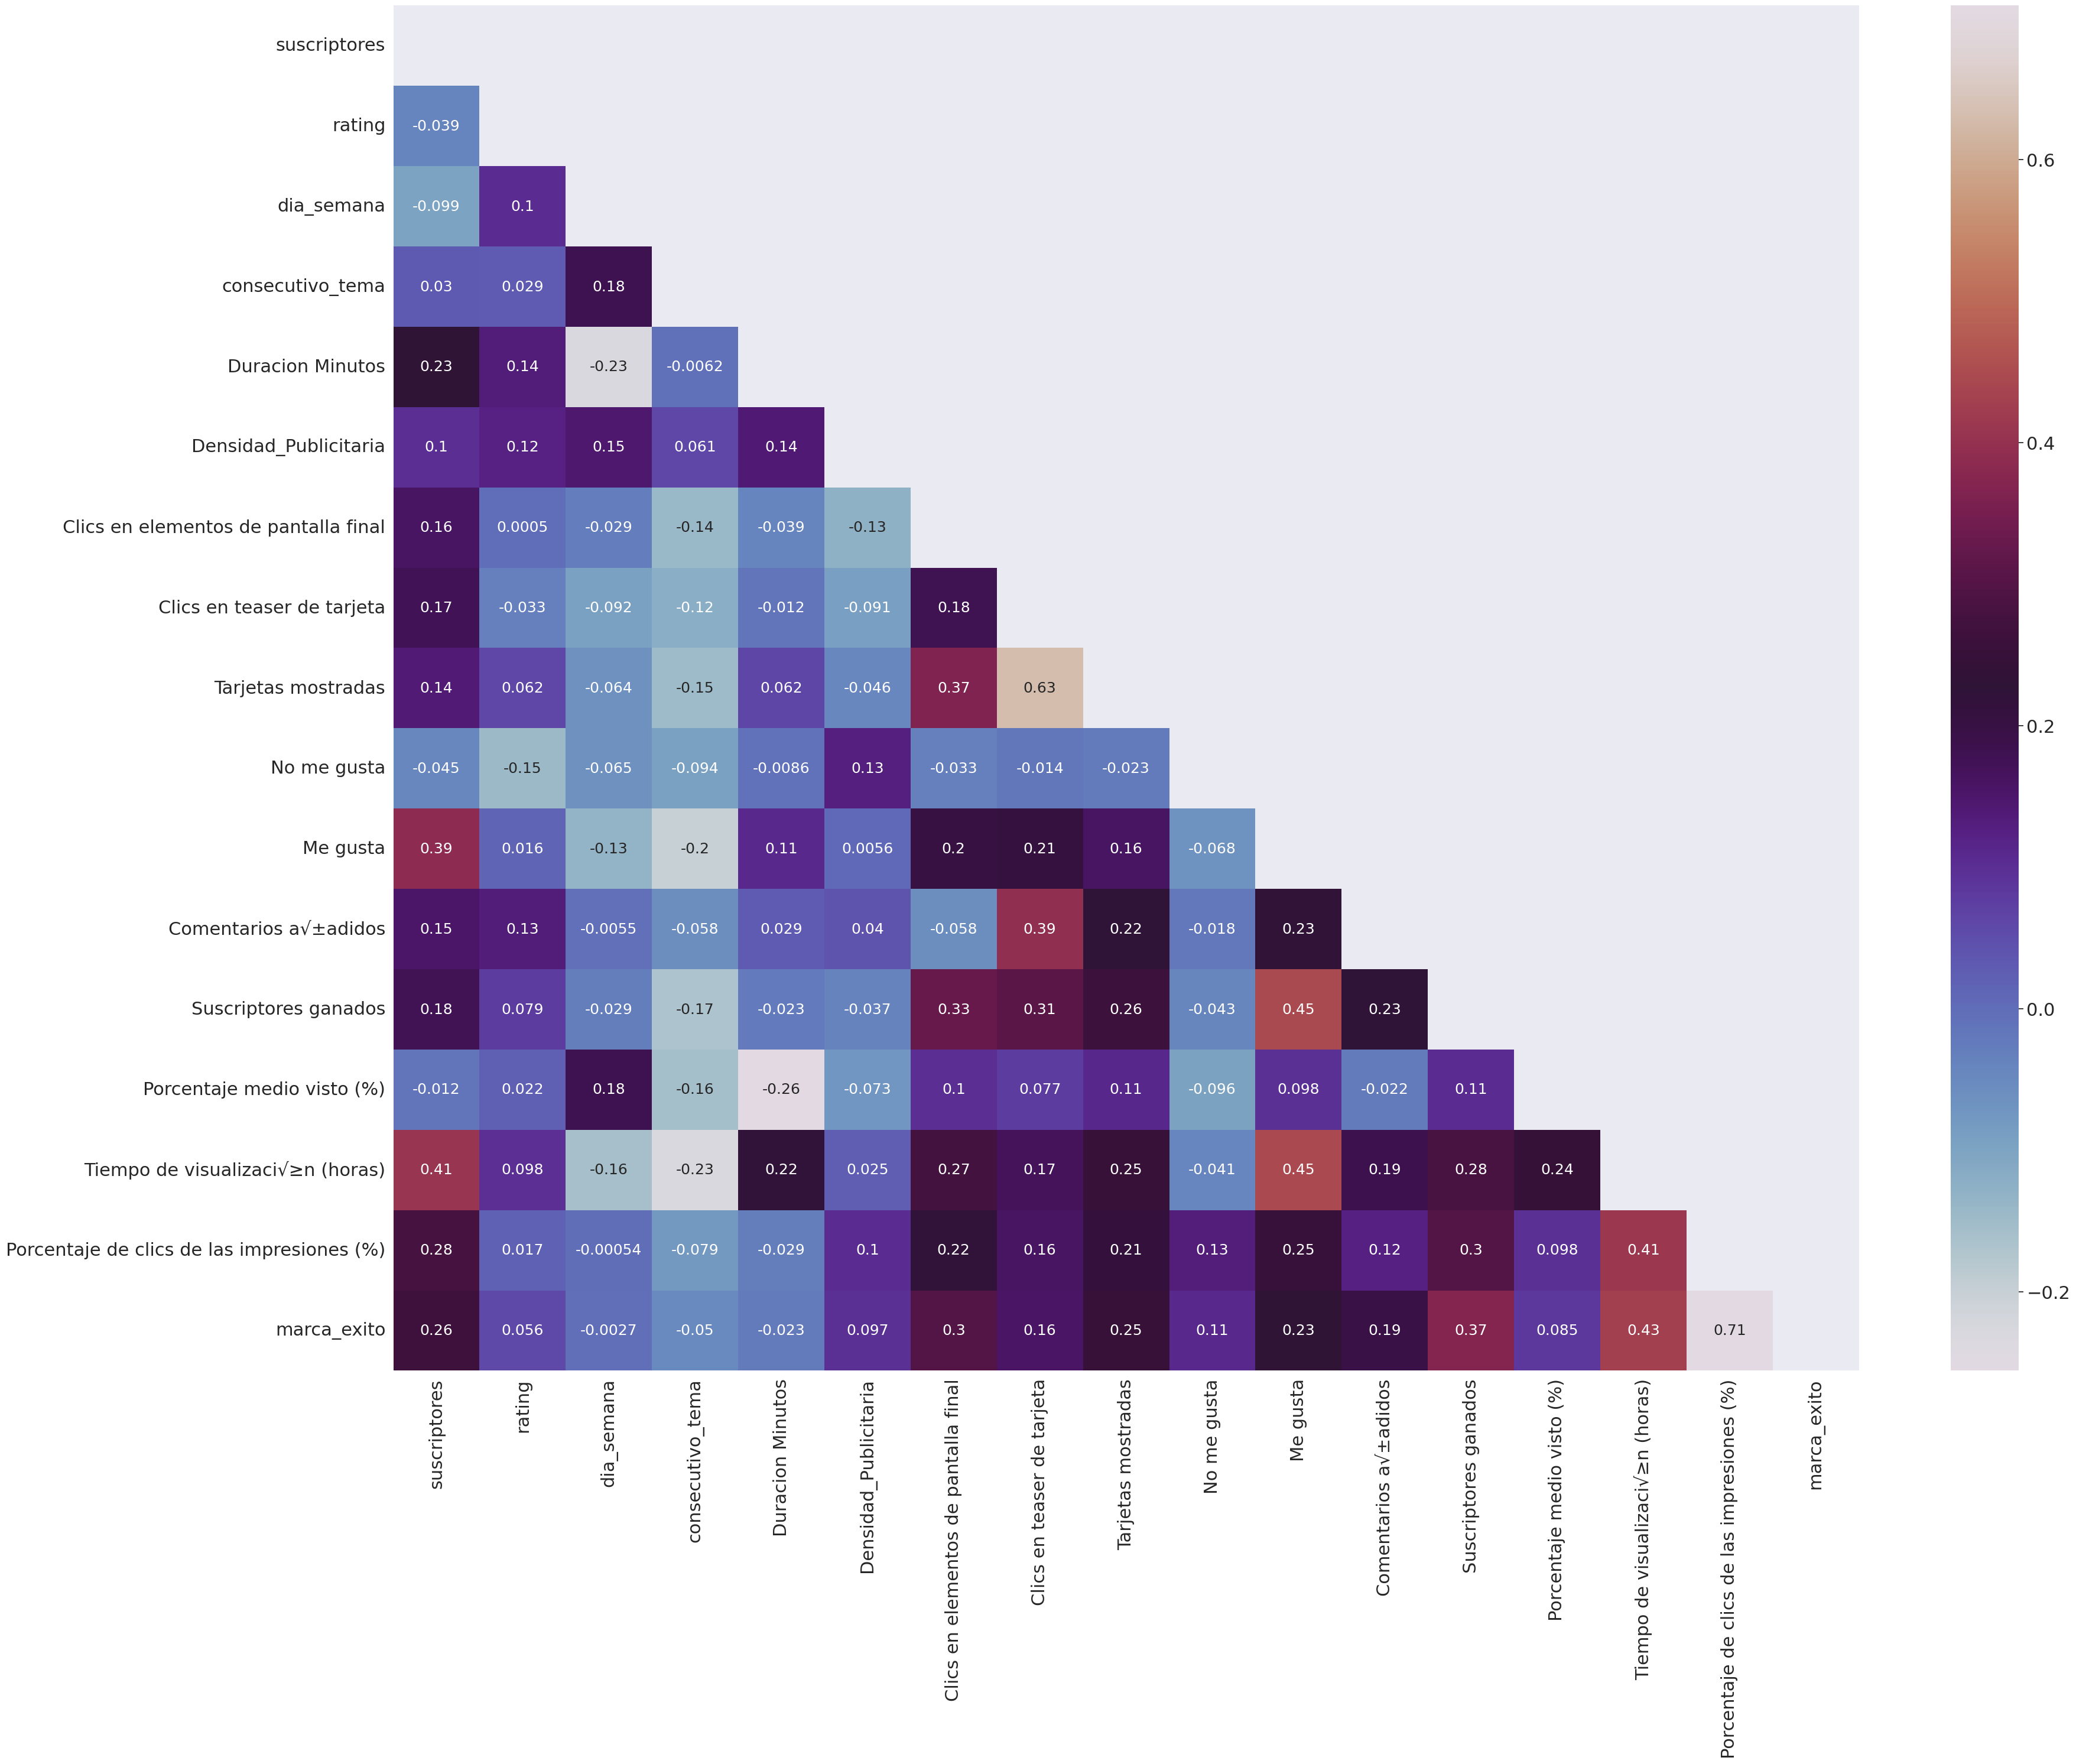

In [15]:
# CORRELACIONES SIMPLES
plt.figure(figsize = (40,30))
sns.set(font_scale=2)
corr_df = data_final.corr(method='kendall')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='twilight',annot_kws={"size":18}, square = False, mask = mask, alpha = 1)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af42914d-1d55-41f0-8851-adb5c602e38b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>